# 假设检验

快速提示：

1. 单样本t检验：问1组样本（**连续变量**）的均值是否和我们对总体均值的假设相一致。
2. 双样本t检验：问2组样本（**连续变量**）的均值是否相同。
3. 卡方检验：问2组样本（**分类变量**）有没有关系。
4. 方差分析：问3组或者更多样本（**连续变量**）的均值是否相同。

## 基本的假设检验

在本节中，我们将介绍如何使用Python来实现基本的假设检验，具体包括单样本t检验和双样本t检验。这些测试是统计分析中常用的方法，用于判断样本数据是否有足够的证据支持特定的假设。

### 单样本t检验
单样本t检验用于检验样本均值是否与已知的总体均值显著不同。

或者说：单样本T检验，就是在检查一个样本的均值是否与我们对总体均值的假设一致。

该检验常用于样本量较小且总体标准差未知时的情况。

**示例代码：使用 `scipy.stats` 进行单样本t检验**


In [7]:
from scipy import stats
import numpy as np

# 示例数据
data = np.array([1.5, 2.5, 2.1, 3.7, 2.8, 2.9, 3.1])

# 总体均值假设
mu = 2.5

# 执行单样本t检验
t_stat, p_value = stats.ttest_1samp(data, popmean=mu)
print(f"样本均值: {data.mean():.2f}")
print(f"对总体均值的假设: {mu}")
print(f"t统计量: {t_stat:.2f}, p值: {p_value:.3f}")

样本均值: 2.66
对总体均值的假设: 2.5
t统计量: 0.58, p值: 0.580


如果p值小于常用的显著性水平（如0.05），则我们拒绝原假设，认为样本均值与我们假设的总体均值有显著差异。

如果p值较大，我们没有足够的证据拒绝原假设，即样本数据并不足以证明总体均值与我们的假设存在显著差异。

或者说：因为p值较大，假如总体的均值真的是2.5，那么从其中抽取到均值为2.66的7个样本，是很有可能的。所以我们不能拒绝总体均值是2.5的原假设。（同样也没法拒绝2.6等等无数个原假设）

### `stats.ttest_1samp` 函数解释
`stats.ttest_1samp` 进行单样本t检验，用以比较样本数据的均值和一个已知的总体均值，以判断二者是否存在显著差异。该检验假设数据来自一个近似正态分布的总体。

#### 参数说明

- **`a`**: 测试样本数据数组。它应该是一个一维数组或类数组对象。
- **`popmean`**: 假设的总体均值。这是一个数值，表示我们期望测试样本均值与之比较的总体均值。
- **`axis`**: 指定在哪一个轴上计算均值和方差。默认为0，意味着对整个数组或第一维度（如果是多维数组）进行操作。
- **`nan_policy`**: 定义如何处理数组中的NaN值。可选项为：
  - `'propagate'`：如果数据中含有NaN，则结果为NaN。
  - `'raise'`：如果数据中含有NaN，则抛出错误。
  - `'omit'`：忽略数据中的NaN值。

#### 输出
函数返回两个值：

- **`t_stat`**: t统计量，一个数值，表示样本均值与总体均值之间差异的标准化值。
- **`p_value`**: p值，用于判断统计显著性。如果p值小于显著性水平（如0.05），则我们拒绝原假设，认为样本均值与总体均值存在显著差异。



### 双样本t检验
双样本t检验用于比较两个独立样本的均值是否存在显著差异。这种类型的检验有助于确定两个独立群体在统计上是否不同。

**示例代码：使用 `scipy.stats` 进行双样本t检验**

In [8]:
from scipy import stats
import numpy as np

# 两组示例数据
group1 = np.array([1.5, 2.5, 2.1, 3.7, 2.8])
group2 = np.array([2.4, 2.3, 2.1, 2.8, 3.0])

# 执行双样本t检验
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"样本1的均值: {group1.mean():.2f}，样本2的均值: {group2.mean():.2f}")
print(f"t统计量: {t_stat:.2f}, p值: {p_value:.3f}")

样本1的均值: 2.52，样本2的均值: 2.52
t统计量: 0.00, p值: 1.000


此处，p值再次用于决定是否拒绝无效假设（即两组的均值相等）。如果p值小于0.05，则认为两个样本组在统计学上有显著差异。

原假设是两者的均值相等，显然当p值很大的时候，我们就不能拒绝的原假设。


### `stats.ttest_ind` 函数说明

`stats.ttest_ind` 用于执行两个独立样本之间的 t-检验。这个检验主要用于比较两个样本均值是否存在显著差异，基于假设两组样本来自具有相同方差的正态分布。

#### 参数说明

- `a, b`：必选参数，代表两组数据的样本数组。这些数据通常应是独立的，即来自两个不相关的群体。
- `axis`：可选参数，默认为0，指定沿哪个轴计算t检验。
- `equal_var`：可选参数，布尔值，默认为True。如果为True，表示执行标准的双样本t检验，假设两组数据具有相同的方差。如果为False，执行Welch's t-test，这不假设等方差。
- `nan_policy`：可选参数，默认为'propagate'。决定如何处理输入数组中的NaN值。可选值包括：
  - `'propagate'`：如果数据中有NaN，返回NaN。
  - `'raise'`：如果数据中有NaN，抛出错误。
  - `'omit'`：忽略NaN值进行计算。

#### 返回值说明
- 返回一个包含两个值的元组：
- 
  - `statistic`：t统计量，表示样本均值之差与其标准误差的比值。
  - `pvalue`：p值，用于基于所选显著性水平评估原假设的可拒绝性。p值越小，拒绝原假设（即两组均值相等）的证据越强。


## t检验的案例

让我们使用 `seaborn` 库中的 `tips` 数据集来演示一个双样本t检验的实例。这个数据集包含了餐厅的小费信息，我们将比较男性和女性在给出小费时是否存在显著差异。

我们的研究目标是确定两个性别在小费给出上是否有统计学上的差异。我们将进行双样本t检验，以检验男性和女性给出的小费均值之间是否存在显著差别。

### Python 实现代码
首先，我们需要导入必要的库，并加载数据：

In [9]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 加载数据
tips = sns.load_dataset("tips")

# 查看数据结构
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


接下来，我们将提取男性和女性小费的数据，并进行双样本t检验：

In [10]:
# 提取男性和女性的小费数据
male_tips = tips[tips["sex"] == "Male"]["tip"]
female_tips = tips[tips["sex"] == "Female"]["tip"]

# 执行双样本t检验
t_stat, p_value = stats.ttest_ind(
    male_tips, female_tips, equal_var=False
)  # 使用Welch's t-test

print(f"t统计量: {t_stat:.3f}, p值: {p_value:.3f}")

t统计量: 1.490, p值: 0.138


### 解析结果
在运行上述代码后，您将获得一个t统计量和一个p值。根据p值的大小，我们可以判断两个性别在小费上是否存在显著差异：

如果p值小于0.05（常用的显著性水平），则我们拒绝原假设，认为男性和女性在小费给出上有显著差异。
如果p值大于0.05，我们则没有足够的证据拒绝原假设，认为两个性别在小费上没有显著差异。
这样的案例不仅展示了如何实际运用双样本t检验，还可以帮助理解如何通过数据分析来探索性别对消费行为的潜在影响。

原假设是两者没有差异，显然p值较大，因此我们不能拒绝原假设。

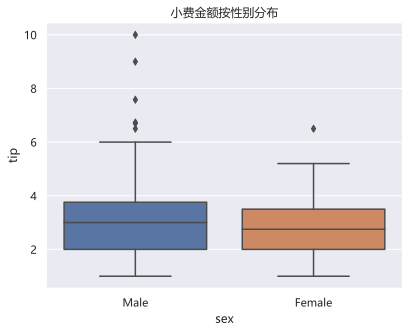

In [11]:
# 绘制小费数据的箱型图，比较两个性别
sns.boxplot(x="sex", y="tip", data=tips)
plt.title("小费金额按性别分布");

## 卡方检验

卡方检验是统计学中一种常用的非参数检验方法，用于检验两个分类变量之间的独立性。本节将介绍如何使用Python来实现卡方检验，具体包括计算卡方统计量和相应的p值，以此判断变量之间是否存在统计学上的关联。

卡方检验通过比较观察频数和期望频数的差异来检验两个分类变量之间是否独立。其核心是卡方统计量的计算，该统计量表达了观察值与期望值之间的差异程度。公式如下：


$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

其中$O_i$是观察频数，$E_i$是在假设变量独立时的期望频数。


或者说：卡方检验问，两个分类变量之间有没有关系？用一个变量是否可以推断另一个变量？



### Python 实现代码

我们将使用 `seaborn` 库中的 `tips` 数据集进行示例，检验顾客的性别（男性或女性）和是否吸烟（是或否）之间是否独立。

用卡方检验来检查2个分类变量有没有关，即：

1. 数据：性别和是否抽烟是2个分类变量
2. 问：“性别能否预测吸烟情况”或“吸烟情况能否预测性别”

In [12]:
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd

# 加载数据集
tips = sns.load_dataset("tips")

# 创建列联表
table = pd.crosstab(tips["sex"], tips["smoker"])

# 查看列联表
table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


`pd.crosstab`主要用于生成2个或者更多因子（分类变量）的列联表。

In [13]:
# 执行卡方检验
chi2, p, dof, expected = chi2_contingency(table)

print(f"卡方统计量: {chi2:.3f}")
print(f"p值: {p:.3f}")
print(f"自由度: {dof}")
print(f"期望频数:\n{expected}")

卡方统计量: 0.000
p值: 1.000
自由度: 1
期望频数:
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


### 解析结果

太长不看版：卡方检验的原假设是2个变量是相互独立的，没有关系。p值很大，我们无法拒绝原假设。即从数据上看，性别和吸烟这两个分类变量没有什么关系。

- **卡方统计量**：提供了观察频数和期望频数差异的量度。
- **p值**：用于判断两个变量是否独立。如果p值小于显著性水平（例如0.05），则我们拒绝原假设，认为变量之间不独立。
- **自由度**：由分类变量的类别数决定。
- **期望频数**：在假设分类变量完全独立的情况下，根据边缘总数计算得到的频数。

根据卡方检验的结果，我们可以对数据进行以下解读：

### 解读卡方检验结果

1. **卡方统计量**：
   卡方统计量的值为0.000，这表明观察频数与期望频数之间几乎没有差异。在卡方检验中，统计量越大，表明观察值与期望值的差异越大，相应的变量之间的关联性可能越强。

2. **p值**：
   p值为1.000，这是一个极高的值，远远超过了常见的显著性水平（如0.05或0.01）。这意味着我们没有足够的证据拒绝原假设，即性别和是否吸烟在统计上是独立的。在实际应用中，一个如此高的p值通常表明两个变量之间没有任何关联。

3. **自由度**：
   自由度为1，这是由于我们的列联表是一个2x2表（两个类别的性别和两个类别的是否吸烟）。自由度的计算公式为 (行数-1) * (列数-1)，在这个例子中是 (2-1) * (2-1) = 1。

4. **期望频数**：
   期望频数是在假设性别与是否吸烟完全独立的条件下，根据边际总数计算得到的。期望频数如下：
   - 男性，非吸烟者: 59.84
   - 男性，吸烟者: 97.16
   - 女性，非吸烟者: 33.16
   - 女性，吸烟者: 53.84

   这些值表明，在每个组合类别中，观察频数与这些期望频数非常接近，进一步支持了性别和吸烟习惯在统计上的独立性。

### 结论
基于这些结果，我们可以得出结论，性别与是否吸烟之间在统计学上没有显著的关联。对于研究者来说，这可能意味着需要重新考虑这两个变量之间关系的假设，或者可能需要在更大的样本或不同的人群中探索这一关系。

## 方差分析



方差分析（ANOVA）是一种用于比较三个或更多样本均值的统计方法，以判断不同组之间是否存在显著的均值差异。这是理解多个群体之间差异的关键技术，广泛应用于各类实验设计和数据分析中。

### 方差分析的基本原理
方差分析旨在分析不同组内的数据变异性和组间的数据变异性，来判断各组总体均值是否相等。如果组间差异显著大于组内差异，我们可能有理由拒绝均值相等的原假设。

### 示例代码：使用 `statsmodels` 进行一元方差分析

我们将使用 `statsmodels` 库中的 `iris` 数据集进行示例，该数据集包含了不同种类鸢尾花的花瓣长度数据。我们的目标是检验不同种类鸢尾花的花瓣长度是否存在显著差异。



In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# 加载数据集
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris["species"].unique()
# 有3个品种

array(['setosa', 'versicolor', 'virginica'], dtype=object)

方差分析问：不同的类别（3个以上）的样本，其某一个属性的均值（连续变量）是否有显著差异？

在本案中，即问：鸢尾花的3个品种，其花瓣长度是否有显著差异？

原假设：没有差异。


In [16]:
# 定义模型，'petal_length'为因变量，'species'为自变量
model = ols("petal_length ~ species", data=iris).fit()

# 执行ANOVA
anova_results = sm.stats.anova_lm(model, typ=1)

anova_results.round(3)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,437.103,218.551,1180.161,0.0
Residual,147.0,27.223,0.185,NaN,NaN




### 输出解读

太长不看版本：看品种species行的p值，极小，约等于0。方差分析的原假设是“无差异”，一个很小的p值，即表示我们可以拒绝原假设，即说明这三个品种的鸢尾花的花瓣长度是有差异的。

输出将显示不同来源的平方和（SS），自由度（df），均方（MS），F值和P值。这些统计指标帮助我们理解是否应该拒绝关于种群均值相等的原假设：

- **平方和（SS）**：反映了数据偏离总平均值的程度。
- **自由度（df）**：与组数和样本大小有关。
- **均方（MS）**：平方和除以其相应的自由度。
- **F值**：组间均方与组内均方的比值，用于测试假设。
- **P值**：如果P值小于显著性水平（通常为0.05），则有足够证据拒绝原假设，表明至少两个组的均值存在显著差异。



### 绘图

绘制鸢尾花种类的花瓣长度核密度图。回忆原假设：3个品种的均值相同。如果是这样，图像上看分布的中心应该几乎重叠在一起。显然图形并非如此，符合方差分析的计算。

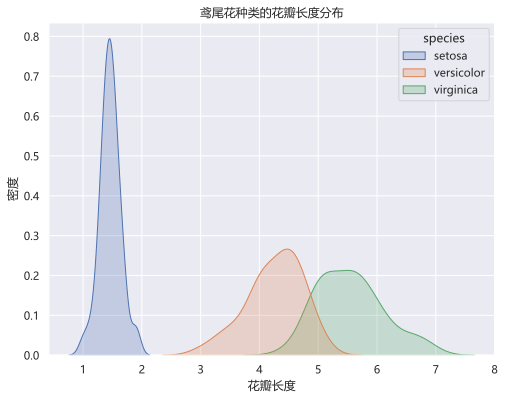

In [17]:
# 绘制核密度图
plt.figure(figsize=(8, 6))
sns.kdeplot(data=iris, x="petal_length", hue="species", fill=True)
plt.title("鸢尾花种类的花瓣长度分布")
plt.xlabel("花瓣长度")
plt.ylabel("密度")
plt.show()

## 综合练习

使用 `titanic` 数据集进行统计分析

**数据集介绍：**
`titanic` 数据集包含泰坦尼克号乘客的信息，如年龄、性别、船舱等级、生存情况等。

**数据分析任务：**

1. **单样本t检验**：
   - **问题**：检验泰坦尼克号乘客的平均年龄是否显著不同于30岁。
   - **假设**：$H_0$:$\mu = 30$，$H_a$:$\mu \neq 30$

2. **双样本t检验**：
   - **问题**：比较一等舱和三等舱乘客的平均年龄是否存在显著差异。
   - **假设**：$H_0$:$\mu_1 = \mu_3$，$H_a$:$\mu_1 \neq \mu_3$

3. **方差分析（ANOVA）**：
   - **问题**：分析不同船舱等级（一等舱、二等舱、三等舱）乘客的平均票价是否存在显著差异。
   - **假设**：$H_0$: 所有等级的平均票价相同，$H_a$: 至少一个等级的平均票价与其他不同。

4. **卡方检验**：
   - **问题**：检验乘客的生存情况是否与乘客的性别有关。
   - **假设**：$H_0$: 生存情况与性别独立，$H_a$: 生存情况与性别不独立。



在`titanic`数据集中涉及的统计分析和测试涉及到的变量及其中英文对照如下：

1. **age（年龄）**：乘客的年龄。
2. **fare（票价）**：乘客支付的票价。
3. **class（船舱等级）**：
   - `First`（一等舱）
   - `Second`（二等舱）
   - `Third`（三等舱）
4. **survived（生存情况）**：
   - `0`（未生存）
   - `1`（生存）
5. **sex（性别）**：
   - `male`（男性）
   - `female`（女性）



In [29]:
### 数据预处理

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 加载数据集
titanic = sns.load_dataset("titanic")

# 数据清洗：填充年龄和票价的缺失值
titanic["age"].fillna(titanic["age"].mean(), inplace=True)
titanic["fare"].fillna(titanic["fare"].median(), inplace=True)

# 查看数据集的前几行
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
